# step1: Load data into jupyter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_excel('pima-data.xlsx')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True


In [3]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True
767,1,93,70,31,0,30.4,0.315,23,0,1.2214,False,False


In [4]:
len(df)

768

# step 2: Clean data

##2.a-let us find if there are any null values

In [5]:
df.isnull().values.any()

False

##2.b-Let us find duplicate columns or co-related columns

## first check how many columns are there----12

In [6]:
def plot_corr(df, size=12):
 corr = df.corr() #pandas data frame correlation function
 fig, ax = plt.subplots(figsize=(size,size))
 ax.matshow(corr) #color code the rectangles by correlation values
 plt.xticks(range(len(corr.columns)), corr.columns)
 plt.yticks(range(len(corr.columns)), corr.columns)



#lets call above columns

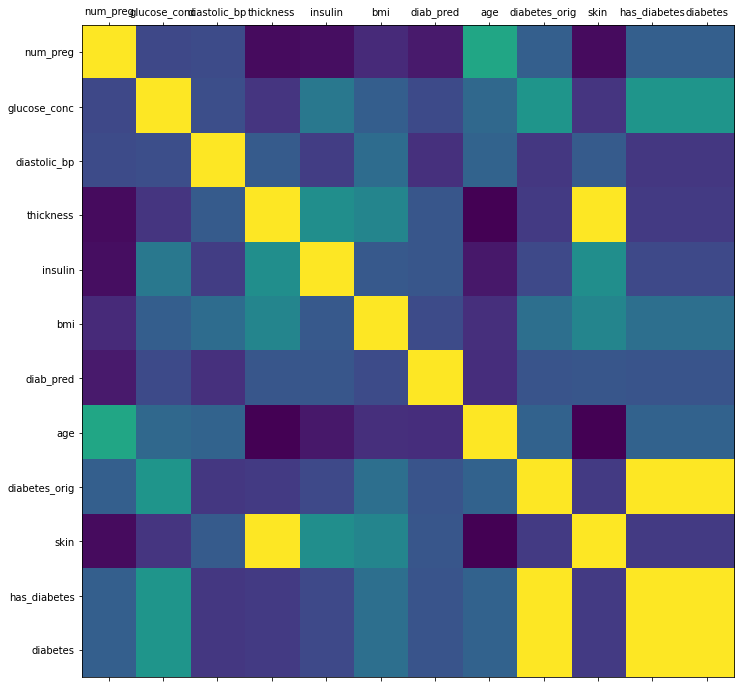

In [7]:
plot_corr(df)

# we are going to remove thickness,diabetes_orig_diabetes

In [8]:
del df['thickness']
del df['has_diabetes']
del df['diabetes_orig']

In [9]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


##2.c-lets convert text to numbers
## machine learning algorithms will not understand text.so convert to numbers.

In [10]:
diabetes_map={True:1,False:0}
df['diabetes']=df['diabetes'].map(diabetes_map)

In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


# let us check propotion of diabeties vs non-diabeties data

### we need to ensure that the proportion should be balanced (50-50) diabwties and non diabetes or at least close enough to proceed

In [12]:
num_true = len(df.loc[df['diabetes'] == True]) 
num_false = len(df.loc[df['diabetes'] == False])
print('true = ', (num_true/ (num_true+num_false) )*100 ) 
print('false = ', (num_false/ (num_true+num_false) )*100 ) 


true =  34.89583333333333
false =  65.10416666666666


## In case of data imbalance we use SMOTE technique to increase lesser data samples

# step 3-Train test split

###let us split data for training and testing the algorithm

In [13]:
from sklearn.model_selection import train_test_split
feature_col_names = ['num_preg','glucose_conc', 'diastolic_bp', 'skin',
 'insulin','bmi','diab_pred','age']
predicted_class_names = ['diabetes']
x = df[feature_col_names].values 
y = df[predicted_class_names].values 
split_test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=split_test_size, random_state=42)


In [14]:
print('# rows in dataframe {0}'.format(len(df)))
print('# rows missing glucose_conc : {0}'.format(len(df.loc[df['glucose_conc']== 0])))
print('# rows missing diastolic_bp : {0}'.format(len(df.loc[df['diastolic_bp']== 0])))
print('# rows missing thickness : {0}'.format(len(df.loc[df['skin']== 0])))
print('# rows missing insulin : {0}'.format(len(df.loc[df['insulin']== 0])))
print('# rows missing bmi : {0}'.format(len(df.loc[df['bmi']== 0])))
print('# rows missing diab_pred : {0}'.format(len(df.loc[df['diab_pred']== 0])))
print('# rows missing age : {0}'.format(len(df.loc[df['age']== 0])))


# rows in dataframe 768
# rows missing glucose_conc : 5
# rows missing diastolic_bp : 35
# rows missing thickness : 227
# rows missing insulin : 374
# rows missing bmi : 11
# rows missing diab_pred : 0
# rows missing age : 0


# lets fill 0's with valid data (eaither mean or mode)

In [15]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy='mean')
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [16]:
x_train[0:10]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 7.09200000e-01,
        5.80000000e+01, 2.39000000e+01, 2.60000000e-01, 2.20000000e+01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 1.14260000e+00,
        3.25000000e+02, 3.69000000e+01, 1.59000000e-01, 2.80000000e+01],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 1.65480000e+00,
        2.50000000e+02, 4.23000000e+01, 3.65000000e-01, 2.40000000e+01],
       [4.00000000e+00, 1.31000000e+02, 6.80000000e+01, 8.27400000e-01,
        1.66000000e+02, 3.31000000e+01, 1.60000000e-01, 2.80000000e+01],
       [1.00000000e+00, 1.03000000e+02, 3.00000000e+01, 1.49720000e+00,
        8.30000000e+01, 4.33000000e+01, 1.83000000e-01, 3.30000000e+01],
       [2.00000000e+00, 8.20000000e+01, 5.20000000e+01, 8.66800000e-01,
        1.15000000e+02, 2.85000000e+01, 1.69900000e+00, 2.50000000e+01],
       [3.00000000e+00, 1.28000000e+02, 7.80000000e+01, 1.12871227e+00,
        1.55333333e+02, 2.11000000e+01, 2.68000000e-01, 5.

# step4: Train The Model

In [17]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())


GaussianNB()

### let test the algorithm's accuracy with training data itself

In [18]:
nb_predict_train = nb_model.predict(x_train)
from sklearn import metrics
#accuracy
print('accuracy : {0:.4f}'.format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

accuracy : 0.7542



# Step5:Testing Model

In [19]:
nb_predict_test = nb_model.predict(x_test)
from sklearn import metrics
print('accuracy : {0:.4f}'.format(metrics.accuracy_score(y_test, nb_predict_test)))
print()


accuracy : 0.7359



# step 6:Analyze the Model Accuracy

In [20]:
print('confusion matrix')
print('{0}'.format(metrics.confusion_matrix(y_test, nb_predict_test)))
print('')
print('classification report')
print(metrics.classification_report(y_test, nb_predict_test))

confusion matrix
[[118  33]
 [ 28  52]]

classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



# final observation of naive bayes algo==>accuracy 73%,recall 81%

## Type 2 error values should be less compared to type 1 error

## let us try random forest algorithm

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())
rf_predict_test = rf_model.predict(x_test)
print('accuracy : {0:.4f}'.format(metrics.accuracy_score(y_test, rf_predict_test)))


accuracy : 0.7403


#### let us see confusion matrix and classification report 

In [22]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print('')
print('classification report')
print(metrics.classification_report(y_test, rf_predict_test))

[[119  32]
 [ 28  52]]

classification report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## let us try with logistic regression algorithm

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='balanced',C=0.2, random_state = 42) 
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, lr_predict_test)))
print('')
print(metrics.confusion_matrix(y_test, lr_predict_test))
print('')
print('classification report')
print(metrics.classification_report(y_test, lr_predict_test))


accuracy: 0.7143

[[111  40]
 [ 26  54]]

classification report
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       151
           1       0.57      0.68      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.71      0.72       231



C:\Users\Rajasekhar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Final conclusion -we are suggesting random forest algorithm for this project as the accuracy is 75% and recall value is 82% which is higher than other to algorithms (i.e,Nave Bayes and logistic regression algorithm)